# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [45]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:

url = "https://api.openweathermap.org/data/2.5/weather?id=524901&appid="
weather_url= url + weather_api_key
weather_url


#Found it here: https://openweathermap.org/faq#onecall 
# api.openweathermap.org/data/2.5/weather?id=524901&appid=YOUR_API_KEY 

'https://api.openweathermap.org/data/2.5/weather?id=524901&appid=573b5ff1c795d38d97071fc17384bf73'

In [47]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units= "metric"
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #https://openweathermap.org/current
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahibadhoo
Processing Record 2 of Set 1 | sarkand
Processing Record 3 of Set 1 | hadibu
Processing Record 4 of Set 1 | walvis bay
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | pennagaram
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | ranot
Processing Record 9 of Set 1 | yorkton
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | tazovsky
Processing Record 12 of Set 1 | xingcheng
Processing Record 13 of Set 1 | barcelona
Processing Record 14 of Set 1 | keflavik
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 17 of Set 1 | cartagena
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | porto novo
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | kourou
Processing Record 22 of Set 1 | tone

Processing Record 39 of Set 4 | badger
Processing Record 40 of Set 4 | hillsboro
Processing Record 41 of Set 4 | gorele
Processing Record 42 of Set 4 | tangalle
Processing Record 43 of Set 4 | enewetak
Processing Record 44 of Set 4 | burang
Processing Record 45 of Set 4 | ixtapa
Processing Record 46 of Set 4 | melo
Processing Record 47 of Set 4 | luau
Processing Record 48 of Set 4 | cold lake
Processing Record 49 of Set 4 | northam
Processing Record 0 of Set 5 | lazaro cardenas
Processing Record 1 of Set 5 | edson
Processing Record 2 of Set 5 | withernsea
Processing Record 3 of Set 5 | ilukste
Processing Record 4 of Set 5 | vanino
Processing Record 5 of Set 5 | college
Processing Record 6 of Set 5 | kingston
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | seven pagodas
Processing Record 9 of Set 5 | queenstown
Processing Record 10 of Set 5 | carnarvon
Processing Record 11 of Set 5 | makokou
Processing Record 12 of Set 5 | viligili
City not found. Skipping...
Process

City not found. Skipping...
Processing Record 33 of Set 8 | toccoa
Processing Record 34 of Set 8 | kudat
Processing Record 35 of Set 8 | hemsby
Processing Record 36 of Set 8 | cloquet
Processing Record 37 of Set 8 | meadow lakes
Processing Record 38 of Set 8 | kibakwe
Processing Record 39 of Set 8 | sandnessjoen
Processing Record 40 of Set 8 | ventspils
Processing Record 41 of Set 8 | terespol
Processing Record 42 of Set 8 | caxias
Processing Record 43 of Set 8 | qaisumah
Processing Record 44 of Set 8 | erwin
Processing Record 45 of Set 8 | laojunmiao
Processing Record 46 of Set 8 | maintirano
Processing Record 47 of Set 8 | cable beach
City not found. Skipping...
Processing Record 48 of Set 8 | esik
Processing Record 49 of Set 8 | daxi
Processing Record 0 of Set 9 | todos santos
Processing Record 1 of Set 9 | kharsia
Processing Record 2 of Set 9 | nuuk
Processing Record 3 of Set 9 | skrunda
Processing Record 4 of Set 9 | aral
Processing Record 5 of Set 9 | hami
Processing Record 6 of 

Processing Record 25 of Set 12 | khash
Processing Record 26 of Set 12 | ruidoso
Processing Record 27 of Set 12 | xiangtan
Processing Record 28 of Set 12 | la foa
Processing Record 29 of Set 12 | heyuan
Processing Record 30 of Set 12 | calp
Processing Record 31 of Set 12 | forquilhinha
Processing Record 32 of Set 12 | hakkari
Processing Record 33 of Set 12 | acarau
Processing Record 34 of Set 12 | berezovyy
Processing Record 35 of Set 12 | balkanabat
Processing Record 36 of Set 12 | prado
Processing Record 37 of Set 12 | attapeu
Processing Record 38 of Set 12 | richland
Processing Record 39 of Set 12 | trairi
Processing Record 40 of Set 12 | bikenibeu village
Processing Record 41 of Set 12 | adh dhibiyah
City not found. Skipping...
Processing Record 42 of Set 12 | murrells inlet
Processing Record 43 of Set 12 | acolla
Processing Record 44 of Set 12 | fannuj
City not found. Skipping...
Processing Record 45 of Set 12 | buka
Processing Record 46 of Set 12 | awjilah
Processing Record 47 of 

In [48]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -72.4167, 'lat': -35.3333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 288.43,
  'feels_like': 287.84,
  'temp_min': 288.43,
  'temp_max': 288.43,
  'pressure': 1014,
  'humidity': 70,
  'sea_level': 1014,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 3.38, 'deg': 191, 'gust': 4.33},
 'clouds': {'all': 8},
 'dt': 1711430341,
 'sys': {'country': 'CL', 'sunrise': 1711450678, 'sunset': 1711493531},
 'timezone': -10800,
 'id': 3893726,
 'name': 'Constitución',
 'cod': 200}

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data, columns =['City', 'Lat', 'Lng', 'Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahibadhoo,3.7833,72.9667,302.54,76,100,5.15,MV,1711430297
1,sarkand,45.4100,79.9186,286.29,50,2,3.12,KZ,1711430297
2,hadibu,12.6500,54.0333,301.46,71,5,2.17,YE,1711429781
3,walvis bay,-22.9575,14.5053,289.87,81,28,5.05,NA,1711429901
4,bethel,41.3712,-73.4140,276.35,54,0,5.14,US,1711429765


In [114]:
#Update: I realized when I was almost done with VacationPy that these units are actually in Kelvin rather than Celsius not sure why it did that but I'll just convert it here. 

# Convert temperature columns from Kelvin to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahibadhoo,3.7833,72.9667,-790.06,76,100,5.15,MV,2024-03-26 05:18:17
1,sarkand,45.4100,79.9186,-806.31,50,2,3.12,KZ,2024-03-26 05:18:17
2,hadibu,12.6500,54.0333,-791.14,71,5,2.17,YE,2024-03-26 05:09:41
3,walvis bay,-22.9575,14.5053,-802.73,81,28,5.05,NaN,2024-03-26 05:11:41
4,bethel,41.3712,-73.4140,-816.25,54,0,5.14,US,2024-03-26 05:09:25


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahibadhoo,3.7833,72.9667,302.54,76,100,5.15,MV,1711430297
1,sarkand,45.4100,79.9186,286.29,50,2,3.12,KZ,1711430297
2,hadibu,12.6500,54.0333,301.46,71,5,2.17,YE,1711429781
3,walvis bay,-22.9575,14.5053,289.87,81,28,5.05,NaN,1711429901
4,bethel,41.3712,-73.4140,276.35,54,0,5.14,US,1711429765


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [68]:
# convert dt to yyyy-mm-dd and #test
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'],unit='s')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahibadhoo,3.7833,72.9667,302.54,76,100,5.15,MV,2024-03-26 05:18:17
1,sarkand,45.4100,79.9186,286.29,50,2,3.12,KZ,2024-03-26 05:18:17
2,hadibu,12.6500,54.0333,301.46,71,5,2.17,YE,2024-03-26 05:09:41
3,walvis bay,-22.9575,14.5053,289.87,81,28,5.05,NaN,2024-03-26 05:11:41
4,bethel,41.3712,-73.4140,276.35,54,0,5.14,US,2024-03-26 05:09:25


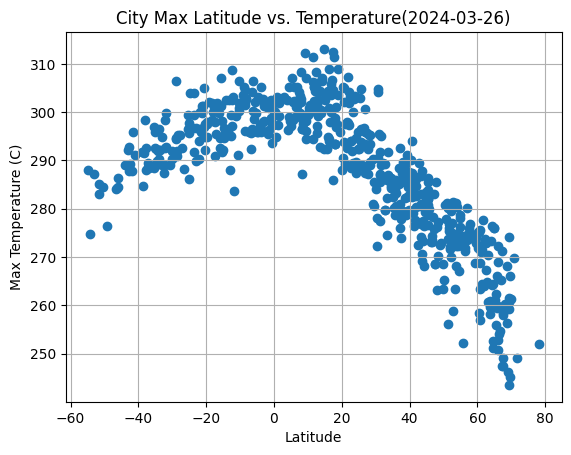

In [106]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o")
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature(2024-03-26)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

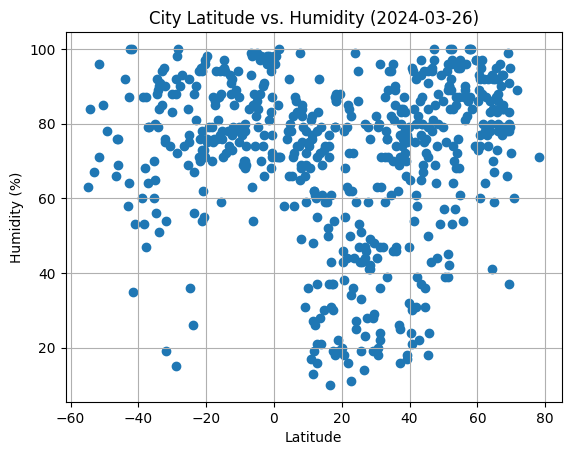

In [107]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2024-03-26)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

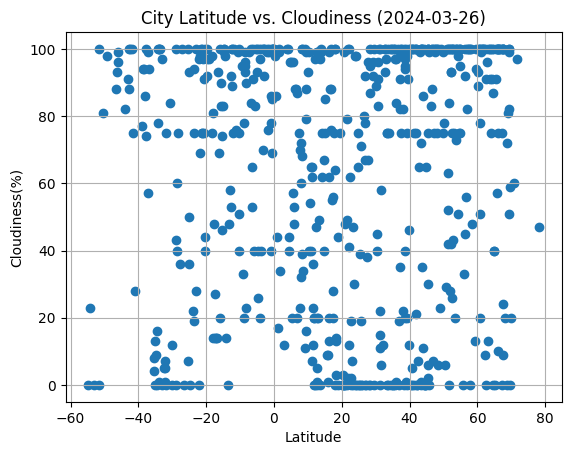

In [108]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (2024-03-26)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

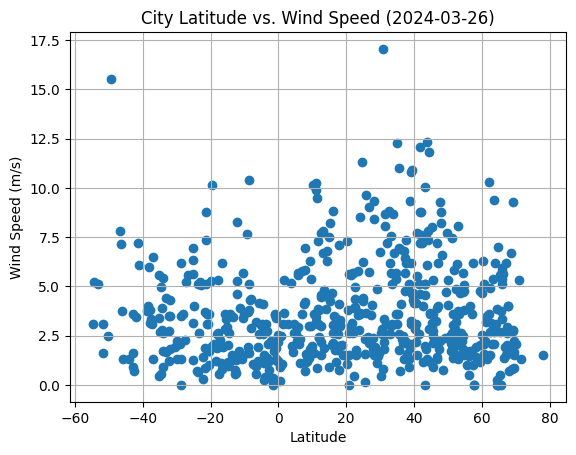

In [79]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2024-03-26)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_values)
plt.ylabel(y_values)
plt.show()


In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data                 
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahibadhoo,3.7833,72.9667,302.54,76,100,5.15,MV,2024-03-26 05:18:17
1,sarkand,45.4100,79.9186,286.29,50,2,3.12,KZ,2024-03-26 05:18:17
2,hadibu,12.6500,54.0333,301.46,71,5,2.17,YE,2024-03-26 05:09:41
4,bethel,41.3712,-73.4140,276.35,54,0,5.14,US,2024-03-26 05:09:25
5,pennagaram,12.1333,77.9000,301.81,26,0,2.39,IN,2024-03-26 05:18:19


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data                 
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,walvis bay,-22.9575,14.5053,289.87,81,28,5.05,NaN,2024-03-26 05:11:41
6,blackmans bay,-43.0167,147.3167,292.22,58,91,0.89,AU,2024-03-26 05:10:16
14,margaret river,-33.9500,115.0667,296.56,51,1,5.41,AU,2024-03-26 05:05:50
16,port-aux-francais,-49.3500,70.2167,276.33,78,98,15.54,TF,2024-03-26 05:09:33
21,west island,-12.1568,96.8225,303.14,79,75,4.63,CC,2024-03-26 05:09:51


###  Temperature vs. Latitude Linear Regression Plot

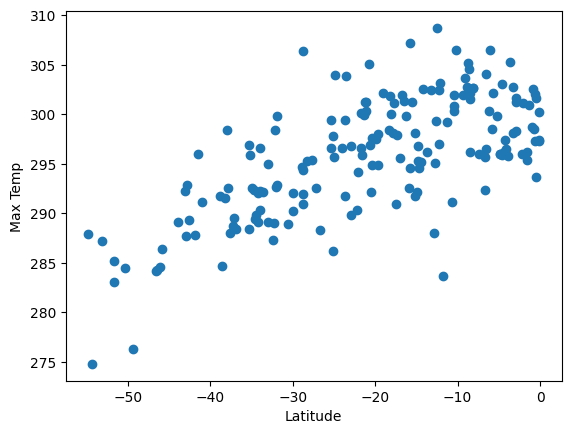

In [89]:
#Create Scatter Plot
#x_values = northern_hemi_df['Lat']
#y_values = northern_hemi_df['Max Temp']
#plt.scatter(x_values,y_values)
#plt.xlabel('Latitude')
#plt.ylabel('Max Temp')
#plt.show()

In [93]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values

#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)

y = 0.29x + 301.76


The r-value is: 0.46269608102832954


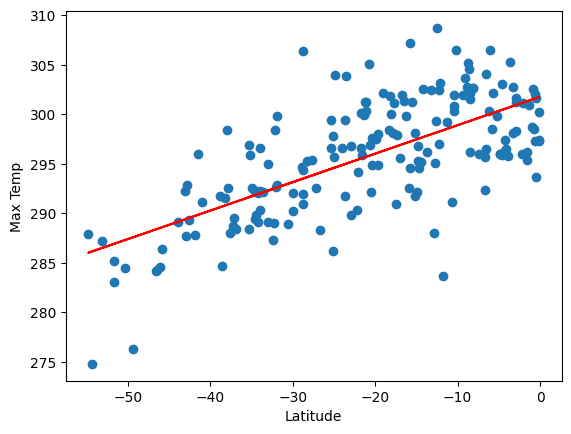

<Figure size 640x480 with 0 Axes>

In [97]:
# Linear regression on Northern Hemisphere
# Create Plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#Get Linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")


# Show plot
plt.show()

plt.savefig("output_data/LinRegNorth1.png")

The r-value is: 0.46269608102832954
The linear equation is: y = 0.29x + 301.76


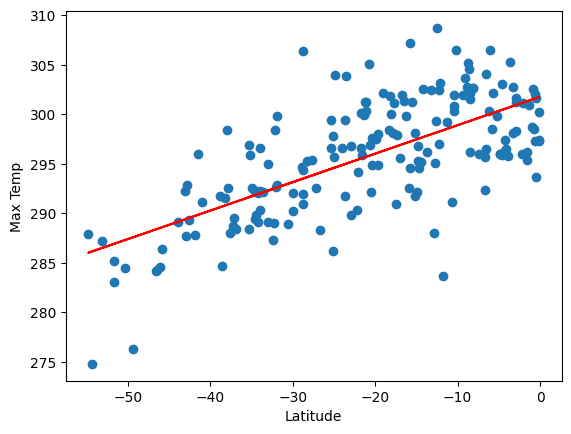

<Figure size 640x480 with 0 Axes>

In [99]:
# Linear regression on Southern Hemisphere

# Create Plot
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#Get Linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")


# Show plot
plt.show()

plt.savefig("output_data/LinRegSouth1.png")

**Discussion about the linear relationship:** So far the equations and relationships of both the Northern and Southern Hemisphere are the same. Based on the graph and r-value there is a weak positive correlation between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05952948850867833
The linear equation is: y = 0.26x + 84.42


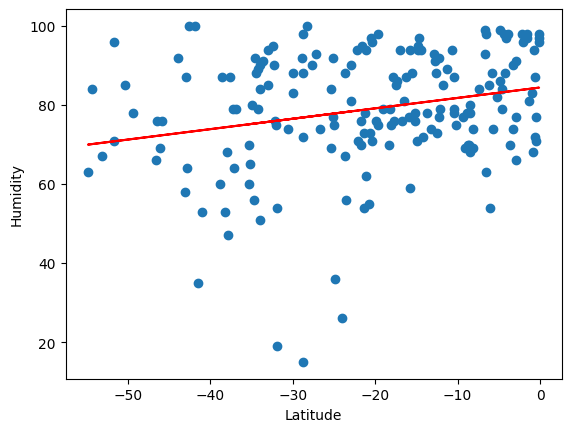

<Figure size 640x480 with 0 Axes>

In [100]:
# Humidity vs. Latitude Linear Regression Plot on Northern Hemisphere

# Create Plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#Get Linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")


# Show plot
plt.show()

plt.savefig("output_data/LinRegNorth2.png")

The r-value is: 0.05952948850867833
The linear equation is: y = 0.26x + 84.42


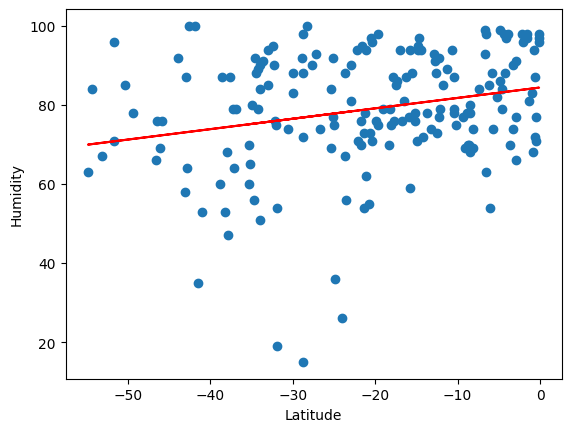

<Figure size 640x480 with 0 Axes>

In [101]:
# Humidity vs. Latitude Linear Regression Plot on Southern Hemisphere
# Create Plot
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#Get Linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")


# Show plot
plt.show()

plt.savefig("output_data/LinRegSouth2.png")

**Discussion about the linear relationship:** Here it seems as though the points are concentrating to the right indicating a potential positve correlation, however they also scattered making it seem like there is no correlation between humidity and latitude. Either way, the r-value is 0.059 which makes it moderate. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05507856175249395
The linear equation is: y = 0.6x + 79.71


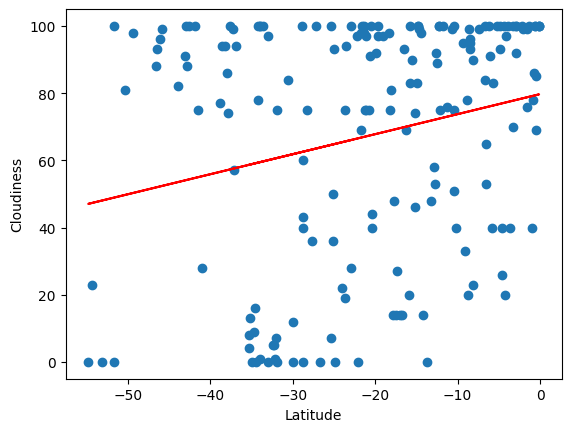

<Figure size 640x480 with 0 Axes>

In [110]:
# Cloudiness vs. Latitude Linear Regression Plot on Northern Hemisphere
# Create Plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#Get Linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")


# Show plot
plt.show()

plt.savefig("output_data/LinRegNorth3.png")

The r-value is: 0.05507856175249395
The linear equation is: y = 0.6x + 79.71


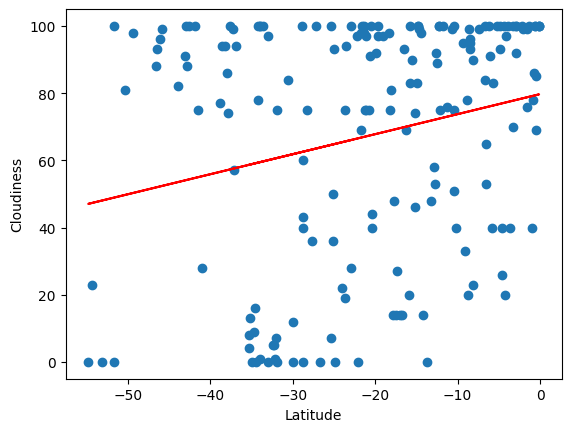

<Figure size 640x480 with 0 Axes>

In [103]:
# Cloudiness vs. Latitude Linear Regression Plot on Southern Hemisphere
# Create Plot
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#Get Linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")


# Show plot
plt.show()

plt.savefig("output_data/LinRegSouth3.png")

**Discussion about the linear relationship:** Here it seems as though the points are scattered making it seem like there is no correlation between cloudiness and latitude in both hemispheres. Either way, the r-value is 0.055 which makes it moderate. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06623693270094039
The linear equation is: y = -0.04x + 2.18


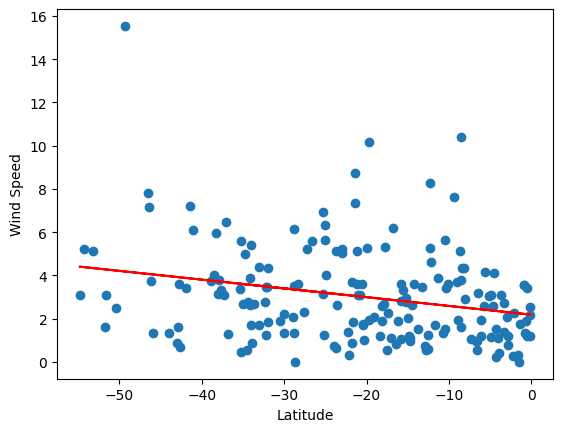

<Figure size 640x480 with 0 Axes>

In [109]:
# Wind Speed vs. Latitude Linear Regression Plot on Northern Hemisphere
# Create Plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#Get Linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")


# Show plot
plt.show()

plt.savefig("output_data/LinRegNorth4.png")

The r-value is: 0.06623693270094039
The linear equation is: y = -0.04x + 2.18


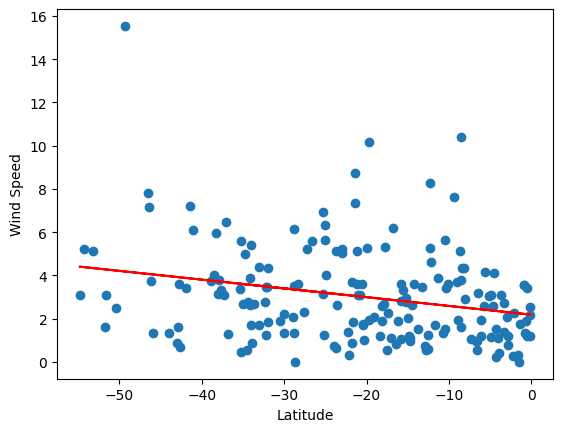

<Figure size 640x480 with 0 Axes>

In [105]:
# Wind Speed vs. Latitude Linear Regression Plot on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#Get Linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")


# Show plot
plt.show()

plt.savefig("output_data/LinRegSouth4.png")

**Discussion about the linear relationship:** The points tend be scattered downwards and with a r-value of 0.066, there is a moderate negative correlation with wind speed, latitude, and both hemispheres. 

For each of these categories, the graphs look the same. On the module, it indicates that not all data will be the same since everyone will get random coordinates from API. Since mine look the same, I'm wondering if these cities are concentrated in a similar region. 

References:
https://openweathermap.org/current 